In [3]:
! pip install ace_tools
! pip install matplotlib
! pip install seaborn



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
file_path = 'dataset_daily_cross_freeze_2_6_month_Justin.csv'
df = pd.read_csv(file_path)

In [6]:
print(df.shape)
print(df.info())

(6612, 166)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6612 entries, 0 to 6611
Columns: 166 entries, Unnamed: 0 to vsat_total_errors_z
dtypes: float64(158), int64(7), object(1)
memory usage: 8.4+ MB
None


In [7]:
df.head()

,Unnamed: 0,location_variance,location_entropy,normalized_location_entropy,distance_traveled,home_stay,num_cluster,total_cluster_stay,home_stay_proportion,max_pairwise_distance,...,totcorrect_df_z,dig_forward_tc_zscore,totcorrect_db_z,br_longestdigb_z,an_z_score,craft_delay_verb_z,craft_delay_para_z,ant_z_score,vsat_total_time_z,vsat_total_errors_z
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.01,-1.28,-1.05,-0.91,1.48,-0.49,0.06,-0.01,46.1,53.3
1,1,-6.573652,0.538630,0.490282,78.522110,17.646453,3.0,21.198072,0.832456,9.409711,...,-1.01,-1.28,-1.05,-0.91,1.48,-0.49,0.06,-0.01,46.1,53.3
2,2,-6.917439,0.688375,0.427711,66.358800,16.460424,5.0,20.268571,0.812116,12.594788,...,-1.01,-1.28,-1.05,-0.91,1.48,-0.49,0.06,-0.01,46.1,53.3
3,3,NaN,NaN,NaN,46.418207,NaN,NaN,NaN,NaN,NaN,...,-1.01,-1.28,-1.05,-0.91,1.48,-0.49,0.06,-0.01,46.1,53.3
4,4,-9.792112,0.263898,0.240211,11.035439,14.137492,3.0,15.046391,0.939594,3.790653,...,-1.01,-1.28,-1.05,-0.91,1.48,-0.49,0.06,-0.01,46.1,53.3


In [8]:
#rename the first un named column to record_id
df.rename(columns={"Unnamed: 0": "record_id"}, inplace=True)

In [9]:
#change the date variable to datetime variable
df['date'] = pd.to_datetime(df['date'])

In [10]:
num_participants = df['participant_id'].nunique()
print(f"Total unique participants: {num_participants}")


Total unique participants: 43


In [11]:
# Count unique dates per participant
monitoring_days = df.groupby('participant_id')['date'].nunique().reset_index()
monitoring_days.columns = ['participant_id', 'days_monitored']
print(monitoring_days)

    participant_id  days_monitored
0                3             199
1                4             197
2                5             215
3                6             214
4                7             138
5                8             187
6                9             191
7               10             191
8               11             188
9               15             196
10              16             199
11              17             200
12              18             190
13              21             190
14              22             204
15              24             191
16              25             189
17              27             205
18              30             191
19              31             188
20              32             176
21              33             202
22              34             160
23              35             196
24              36             193
25              38             179
26              41             169
27              45  

In [12]:
# Summary stats
print("Monitoring days summary:")
print(monitoring_days['days_monitored'].describe())

Monitoring days summary:
count     43.000000
mean     153.767442
std       53.610961
min       28.000000
25%      115.000000
50%      187.000000
75%      194.500000
max      215.000000
Name: days_monitored, dtype: float64


In [13]:
# Count occurrences of participant_id + date combinations
duplicates = df.groupby(['participant_id', 'date']).size().reset_index(name='count')

# Filter where count > 1 (i.e., multiple entries for the same participant on the same day)
multiple_entries = duplicates[duplicates['count'] > 1]

# Display how many such cases exist
print(f"Number of participant-date combinations with multiple entries: {len(multiple_entries)}")

# View a few examples
print(multiple_entries.head())

Number of participant-date combinations with multiple entries: 0
Empty DataFrame
Columns: [participant_id, date, count]
Index: []


In [14]:
# Task 1 - Visualize total variables in the dataset
# List of columns to summarize
columns_of_interest = [
    "total_cluster_stay", "total_unlocks", "total_unlock_duration",
    "total_typing_sessions", "total_words", "total_typing_duration",
    "total_typing_episodes", "tmoca_rater_total",
    "vsat_total_time_z", "vsat_total_errors_z"
]

# Take mean of each variable per participant
participant_summary = df.groupby("participant_id")[columns_of_interest].mean().reset_index()


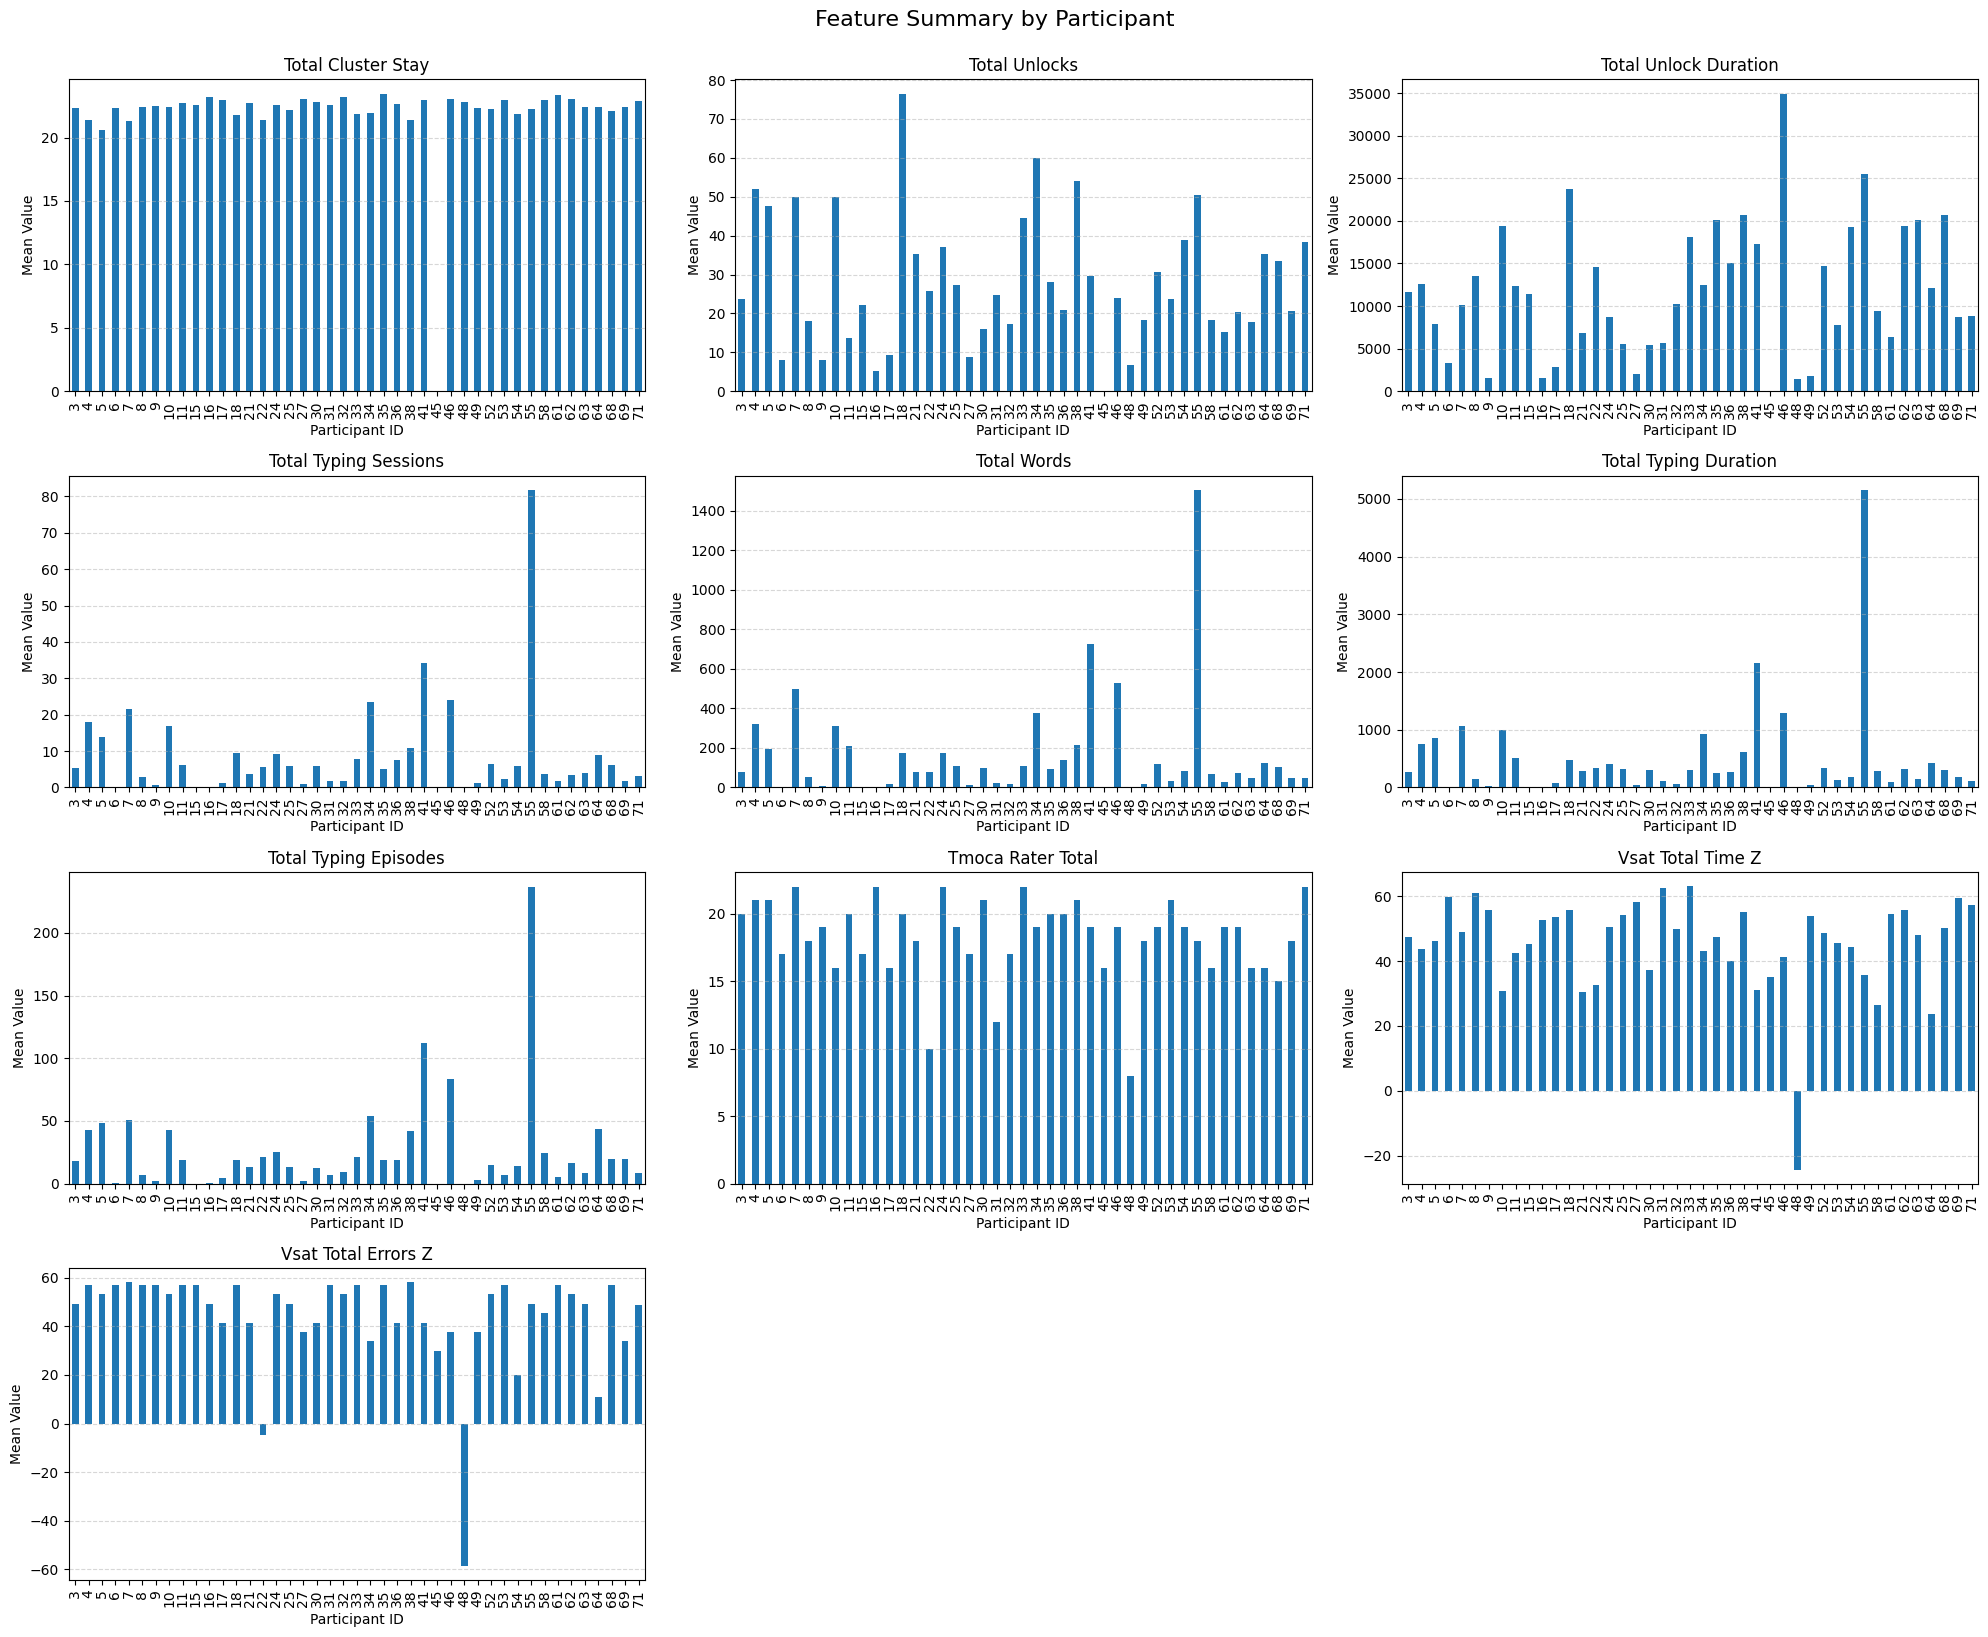

In [15]:
# Layout setup
n_cols = 3
n_rows = -(-len(columns_of_interest) // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

# Plot each variable by participant
for i, col in enumerate(columns_of_interest):
    ax = axes[i]
    participant_summary.plot(x="participant_id", y=col, kind="bar", ax=ax, legend=False)
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel("Participant ID")
    ax.set_ylabel("Mean Value")
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis='x', labelrotation=90)

# Hide extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Feature Summary by Participant", fontsize=16, y=1.02)
plt.show()


In [16]:

# Task 2 - Visualizing tmoca_rater_total
# Create a new category column
df["tmoca_category"] = df["tmoca_rater_total"].apply(
    lambda x: "Normal" if pd.notnull(x) and x >= 18 else "Abnormal"
)


In [17]:
# Select just participant_id, date, and T-MoCA score
tmoca_scores = df[["participant_id", "date", "tmoca_rater_total"]]

# Sort by participant and date
tmoca_scores = tmoca_scores.sort_values(by=["participant_id", "date"])

# View the full list
print(tmoca_scores)



      participant_id       date  tmoca_rater_total
429                3 2023-05-31                 20
430                3 2023-06-01                 20
431                3 2023-06-02                 20
432                3 2023-06-03                 20
433                3 2023-06-04                 20
...              ...        ...                ...
6607              71 2025-02-10                 22
6608              71 2025-02-11                 22
6609              71 2025-02-12                 22
6610              71 2025-02-13                 22
6611              71 2025-02-14                 22

[6612 rows x 3 columns]


In [18]:
# Group by participant_id and return unique T-MoCA scores as a list
unique_tmoca_scores = df.groupby("participant_id")["tmoca_rater_total"].apply(lambda x: sorted(x.dropna().unique()))

# Display
print(unique_tmoca_scores)

# each participant is having only 1 Tmoca score



participant_id
3     [20]
4     [21]
5     [21]
6     [17]
7     [22]
8     [18]
9     [19]
10    [16]
11    [20]
15    [17]
16    [22]
17    [16]
18    [20]
21    [18]
22    [10]
24    [22]
25    [19]
27    [17]
30    [21]
31    [12]
32    [17]
33    [22]
34    [19]
35    [20]
36    [20]
38    [21]
41    [19]
45    [16]
46    [19]
48     [8]
49    [18]
52    [19]
53    [21]
54    [19]
55    [18]
58    [16]
61    [19]
62    [19]
63    [16]
64    [16]
68    [15]
69    [18]
71    [22]
Name: tmoca_rater_total, dtype: object


In [19]:
# Select participant_id and their unique T-MoCA score
tmoca_by_participant = df[["participant_id", "tmoca_rater_total"]].drop_duplicates(subset="participant_id")
tmoca_by_participant


,participant_id,tmoca_rater_total
0,5,21
215,6,17
429,3,20
628,4,21
825,7,22
963,8,18
1150,9,19
1341,10,16
1532,11,20
1720,15,17


In [20]:
# Categorize: Normal (≥ 18) vs. Abnormal (< 18)
tmoca_by_participant["tmoca_category"] = tmoca_by_participant["tmoca_rater_total"].apply(
    lambda x: "Normal" if pd.notnull(x) and x >= 18 else "Abnormal"
)
tmoca_by_participant



,participant_id,tmoca_rater_total,tmoca_category
0,5,21,Normal
215,6,17,Abnormal
429,3,20,Normal
628,4,21,Normal
825,7,22,Normal
963,8,18,Normal
1150,9,19,Normal
1341,10,16,Abnormal
1532,11,20,Normal
1720,15,17,Abnormal


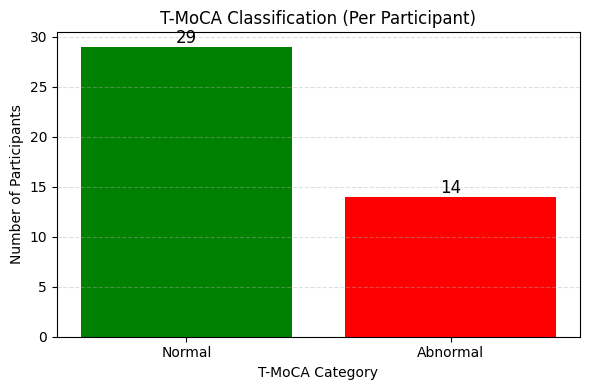

In [21]:
# Count how many participants fall into each category
counts = tmoca_by_participant["tmoca_category"].value_counts()

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.index, counts.values, color=["green", "red"])
plt.title("T-MoCA Classification (Per Participant)")
plt.xlabel("T-MoCA Category")
plt.ylabel("Number of Participants")

# Add count labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


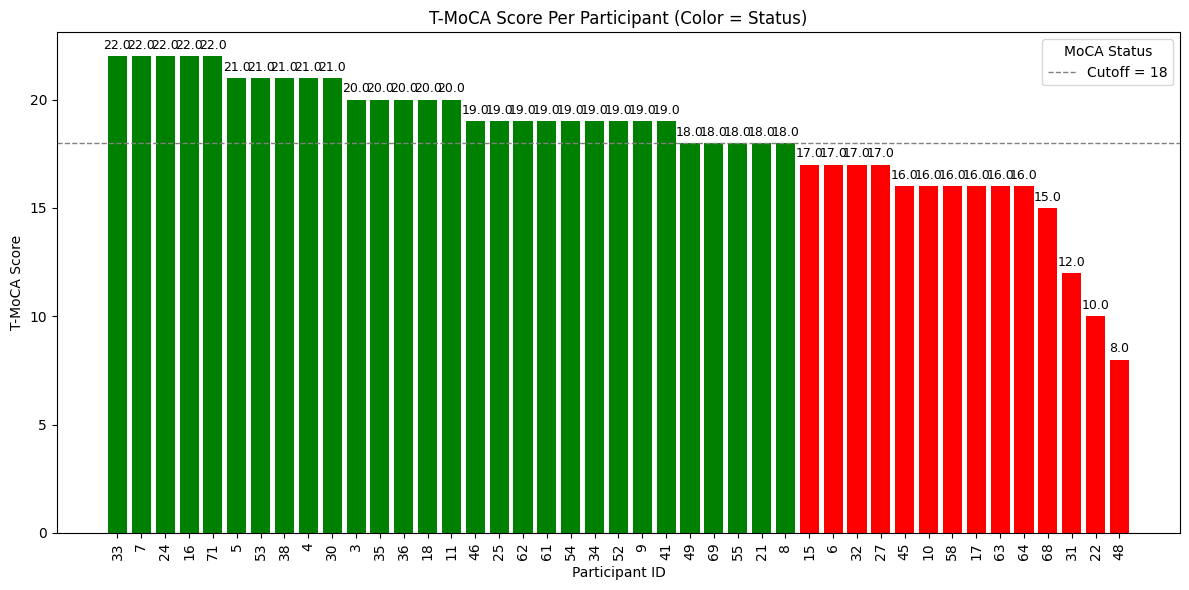

In [22]:
# Sort by score or participant_id (optional)
tmoca_status = tmoca_by_participant.sort_values("tmoca_rater_total", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
colors = tmoca_status["tmoca_category"].map({"Normal": "green", "Abnormal": "red"})
bars = plt.bar(tmoca_status["participant_id"].astype(str), tmoca_status["tmoca_rater_total"], color=colors)

# Label each bar with score
for bar, score in zip(bars, tmoca_status["tmoca_rater_total"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, f"{score:.1f}",
             ha='center', va='bottom', fontsize=9)

plt.axhline(18, color='gray', linestyle='--', linewidth=1, label="Cutoff = 18")
plt.title("T-MoCA Score Per Participant (Color = Status)")
plt.xlabel("Participant ID")
plt.ylabel("T-MoCA Score")
plt.xticks(rotation=90)
plt.legend(title="MoCA Status")
plt.tight_layout()
plt.show()


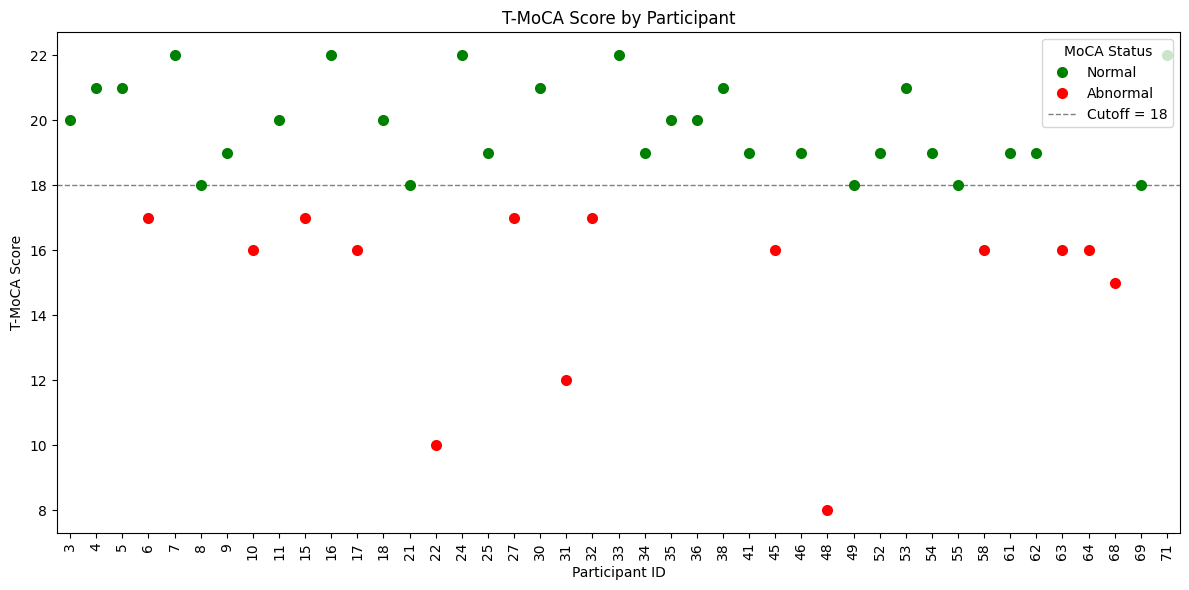

In [23]:
# # Sort participant IDs (optional for visual order)
# tmoca_status = tmoca_status.sort_values("tmoca_rater_total", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=tmoca_status,
    x="participant_id",
    y="tmoca_rater_total",
    hue="tmoca_category",
    palette={"Normal": "green", "Abnormal": "red"},
    size=8,
    jitter=False  # Keep dots aligned for clarity
)

# Add cutoff line
plt.axhline(18, color='gray', linestyle='--', linewidth=1, label="Cutoff = 18")

# Labels and formatting
plt.title("T-MoCA Score by Participant")
plt.xlabel("Participant ID")
plt.ylabel("T-MoCA Score")
plt.xticks(rotation=90)
plt.legend(title="MoCA Status", loc='upper right')
plt.tight_layout()
plt.show()


In [24]:
# Task 3 visualize tmoca wrt demographics
# Keep only one row per participant
tmoca_demo = df.drop_duplicates(subset="participant_id")[
    ["participant_id", "tmoca_rater_total", "sex", "age", "education"]
]

# Add category for T-MoCA status
tmoca_demo["tmoca_category"] = tmoca_demo["tmoca_rater_total"].apply(
    lambda x: "Normal" if pd.notnull(x) and x >= 18 else "Abnormal"
)


/var/folders/73/n4wwy86j3ms7q_z6xsy8_x1h0000gs/T/ipykernel_87506/1372570055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tmoca_demo, x="sex", y="tmoca_rater_total", palette="Set2")


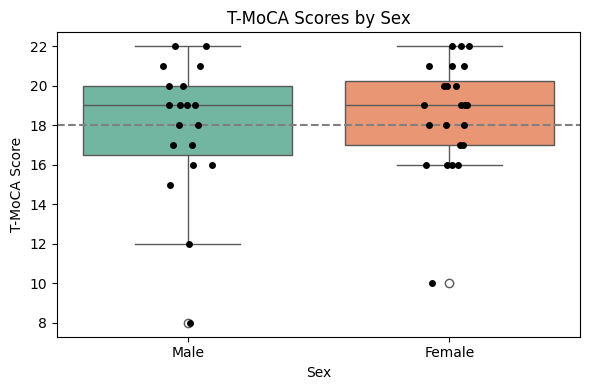

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=tmoca_demo, x="sex", y="tmoca_rater_total", palette="Set2")
sns.stripplot(data=tmoca_demo, x="sex", y="tmoca_rater_total", color="black", size=5, jitter=True)
plt.xticks([0, 1], ["Male", "Female"])
plt.title("T-MoCA Scores by Sex")
plt.xlabel("Sex")
plt.ylabel("T-MoCA Score")
plt.axhline(18, linestyle='--', color='gray')
plt.tight_layout()
plt.show()


/var/folders/73/n4wwy86j3ms7q_z6xsy8_x1h0000gs/T/ipykernel_87506/2500579079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tmoca_demo, x="education", y="tmoca_rater_total", palette="pastel")


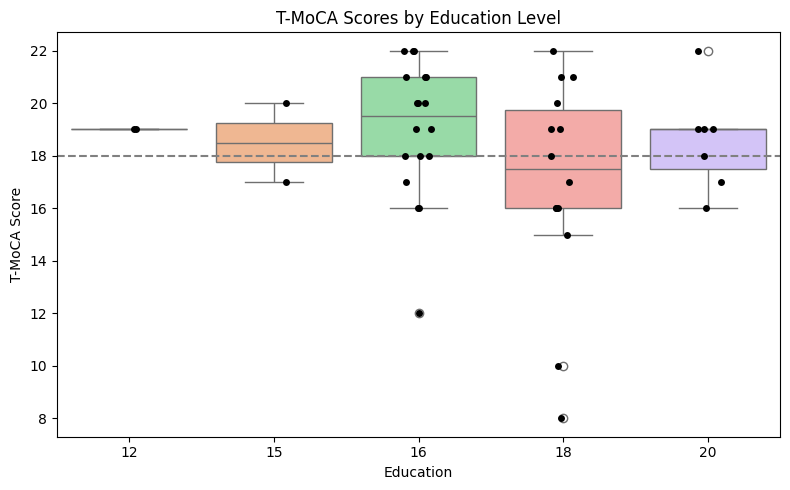

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=tmoca_demo, x="education", y="tmoca_rater_total", palette="pastel")
sns.stripplot(data=tmoca_demo, x="education", y="tmoca_rater_total", color="black", size=5, jitter=True)
plt.axhline(18, linestyle='--', color='gray')
plt.title("T-MoCA Scores by Education Level")
plt.xlabel("Education")
plt.ylabel("T-MoCA Score")
plt.tight_layout()
plt.show()


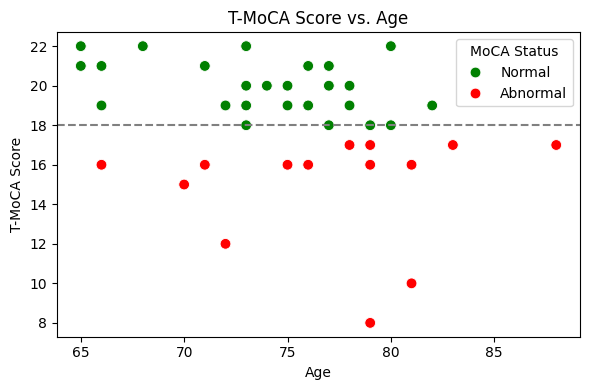

In [27]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=tmoca_demo, x="age", y="tmoca_rater_total", hue="tmoca_category", palette={"Normal": "green", "Abnormal": "red"}, s=60)
plt.axhline(18, linestyle='--', color='gray')
plt.title("T-MoCA Score vs. Age")
plt.xlabel("Age")
plt.ylabel("T-MoCA Score")
plt.legend(title="MoCA Status")
plt.tight_layout()
plt.show()


/var/folders/73/n4wwy86j3ms7q_z6xsy8_x1h0000gs/T/ipykernel_87506/1059231159.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
/var/folders/73/n4wwy86j3ms7q_z6xsy8_x1h0000gs/T/ipykernel_87506/1059231159.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette="pastel")
/var/folders/73/n4wwy86j3ms7q_z6xsy8_x1h0000gs/T/ipykernel_87506/1059231159.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index.a

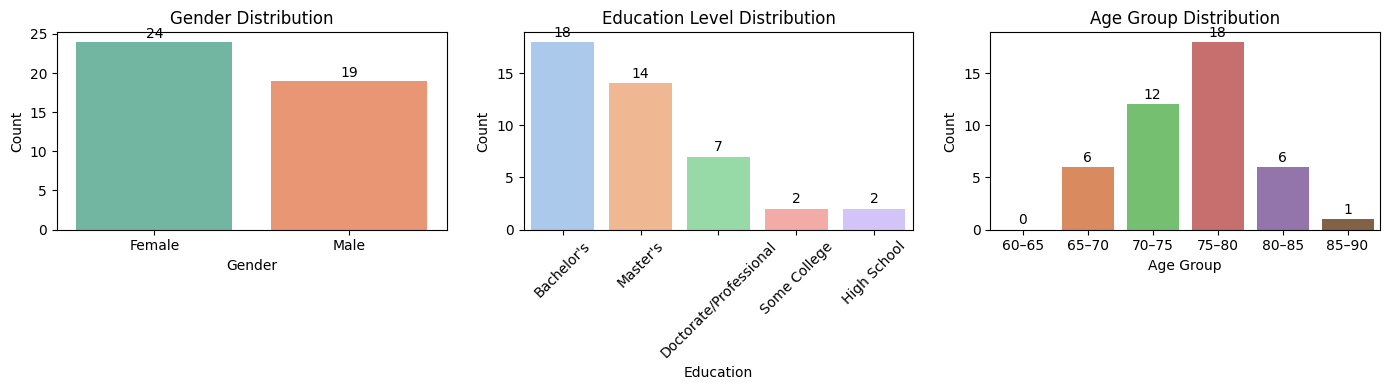

In [28]:
# Task 4 - Plot to view # of paticipants in each demographic groups
# Assuming df is full dataset
# Step 1: Keep only one row per participant (to avoid duplicates)
tmoca_demo = df.drop_duplicates(subset="participant_id")[
    ["participant_id", "sex", "education", "age"]
]

# Step 2: Map gender codes
tmoca_demo["sex_label"] = tmoca_demo["sex"].map({0: "Male", 1: "Female"})

# Step 3: Map education years to labels
education_map = {
    12: "High School",
    15: "Some College",
    16: "Bachelor's",
    18: "Master's",
    20: "Doctorate/Professional"
}
tmoca_demo["education_label"] = tmoca_demo["education"].map(education_map)

# Step 4: Group age into bins
age_bins = [60, 65, 70, 75, 80, 85, 90]
age_labels = ["60–65", "65–70", "70–75", "75–80", "80–85", "85–90"]
tmoca_demo["age_group"] = pd.cut(tmoca_demo["age"], bins=age_bins, labels=age_labels, right=False)

# Step 5: Count values
gender_counts = tmoca_demo["sex_label"].value_counts()
education_counts = tmoca_demo["education_label"].value_counts()
age_group_counts = tmoca_demo["age_group"].value_counts().sort_index()

# Step 6: Plotting
plt.figure(figsize=(14, 4))

# Gender plot
plt.subplot(1, 3, 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xlabel("Gender")
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center')

# Education plot
plt.subplot(1, 3, 2)
sns.barplot(x=education_counts.index, y=education_counts.values, palette="pastel")
plt.title("Education Level Distribution")
plt.ylabel("Count")
plt.xlabel("Education")
plt.xticks(rotation=45)
for i, count in enumerate(education_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center')

# Age group plot
plt.subplot(1, 3, 3)
sns.barplot(x=age_group_counts.index.astype(str), y=age_group_counts.values, palette="muted")
plt.title("Age Group Distribution")
plt.ylabel("Count")
plt.xlabel("Age Group")
for i, count in enumerate(age_group_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.show()


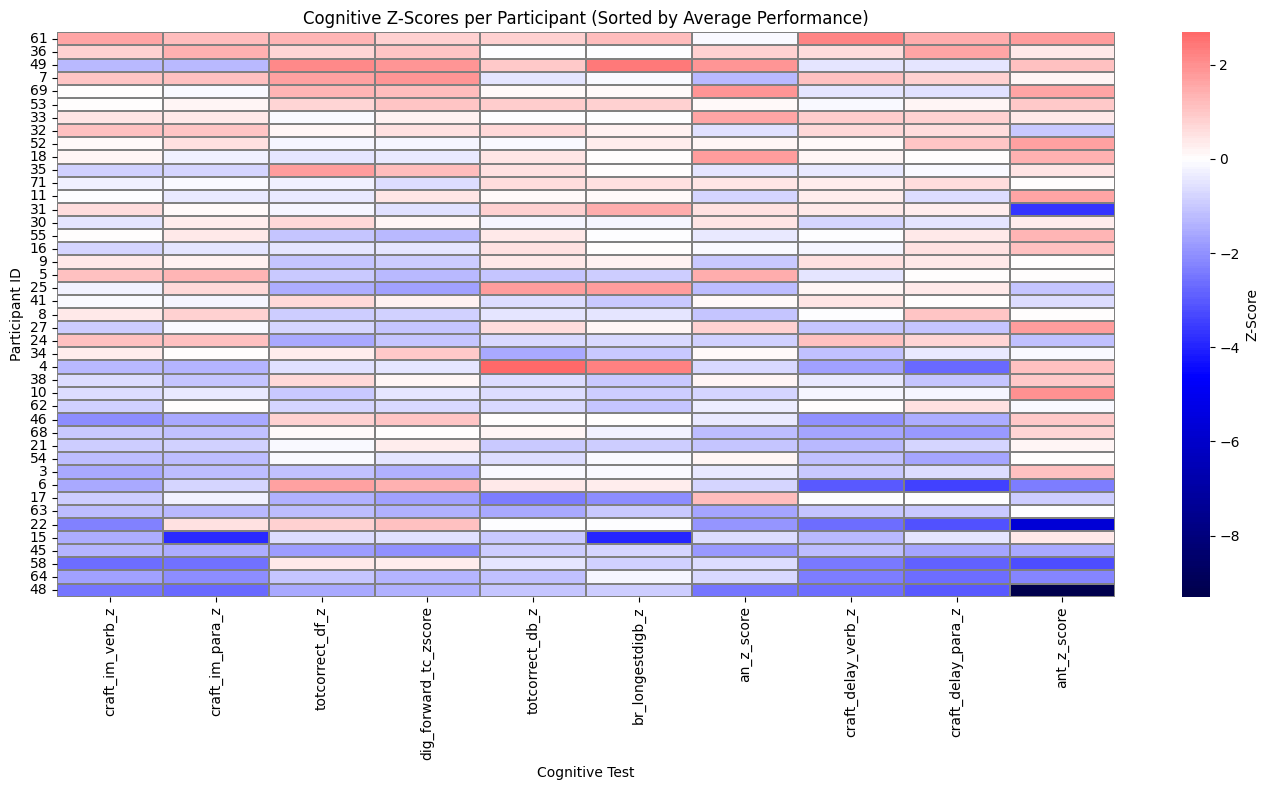

In [29]:

# Task 5 - Visualize cognitive memory
z_score_columns = [
    "craft_im_verb_z", "craft_im_para_z", "totcorrect_df_z",
    "dig_forward_tc_zscore", "totcorrect_db_z", "br_longestdigb_z",
    "an_z_score", "craft_delay_verb_z", "craft_delay_para_z",
    "ant_z_score"
]

# One row per participant
zscore_df = df.drop_duplicates(subset="participant_id")[["participant_id"] + z_score_columns]
zscore_df = zscore_df.set_index("participant_id")

# Calculate mean performance across available z-scores
zscore_df["mean_z"] = zscore_df.mean(axis=1, skipna=True)

# Sort by average performance
zscore_df = zscore_df.sort_values("mean_z", ascending=False).drop(columns="mean_z")

# Plot high-contrast heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    zscore_df,
    cmap="seismic",  # high contrast
    center=0,
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={"label": "Z-Score"}
)
plt.title("Cognitive Z-Scores per Participant (Sorted by Average Performance)")
plt.xlabel("Cognitive Test")
plt.ylabel("Participant ID")
plt.tight_layout()
plt.show()


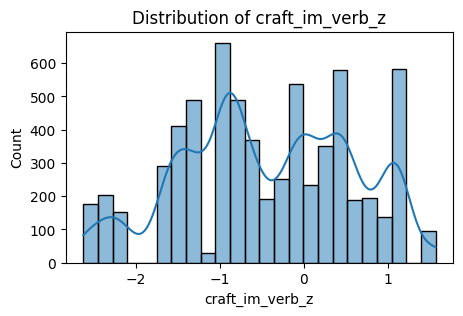

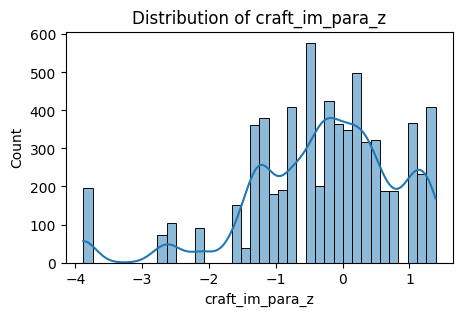

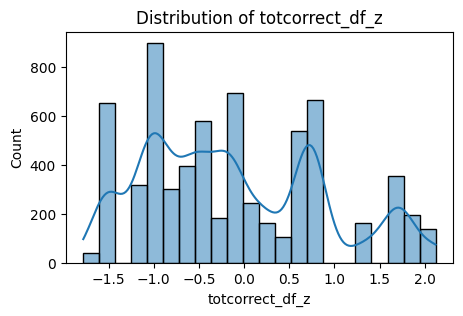

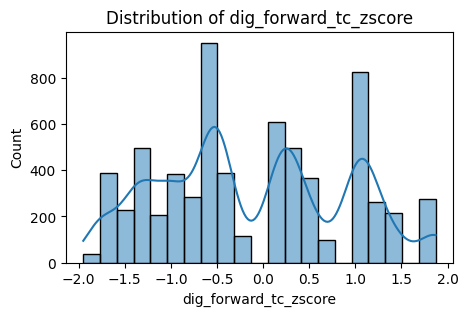

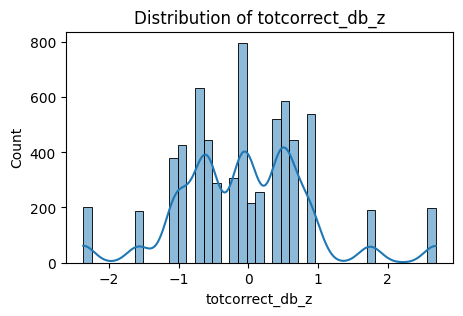

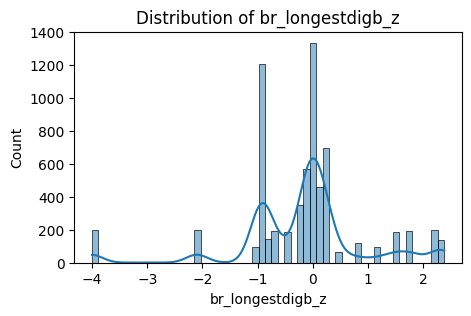

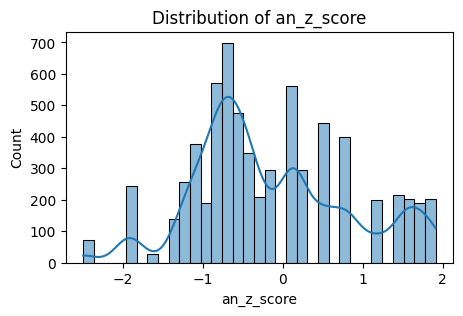

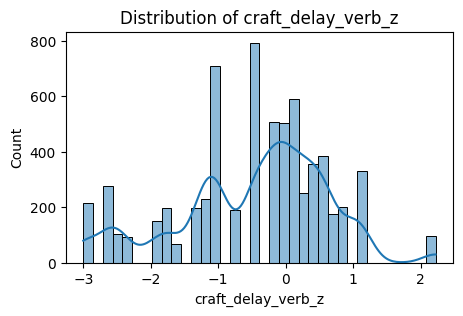

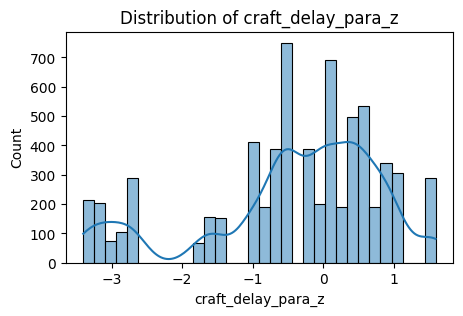

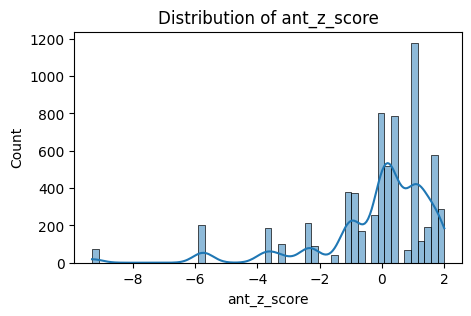

In [30]:
#visualize the distribution of Z scores

for col in z_score_columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [31]:
# TASK 6 - ANALYSE AND VISUALISE TOTAL DISTANCE TRAVELED PER DAY, TOTAL STEPS PER WEEK, AVERAGE WALKING SPEED PER PARTICIPANT


# 1. Total distance traveled per day
df["total_distance"] = df[["walking_distance_pedo", "walking_distance_health"]].mean(axis=1)

# Group by participant and date
daily_distance = (
    df.groupby(["participant_id", "date"])["total_distance"]
    .sum()
    .reset_index(name="total_distance_per_day")
)

daily_distance



,participant_id,date,total_distance_per_day
0,3,2023-05-31,0.945847
1,3,2023-06-01,1.121378
2,3,2023-06-02,1.808753
3,3,2023-06-03,2.265352
4,3,2023-06-04,1.194732
...,...,...,...
6607,71,2025-02-10,1.306105
6608,71,2025-02-11,1.292165
6609,71,2025-02-12,1.199197
6610,71,2025-02-13,0.580338


In [32]:
# ✅ 2. Total Steps Per Week
df["week"] = df["date"].dt.to_period("W")
weekly_steps = (
    df.groupby(["participant_id", "week"])["step_count_pedo"]
    .sum()
    .reset_index(name="total_steps_per_week")
)

weekly_steps

,participant_id,week,total_steps_per_week
0,3,2023-05-29/2023-06-04,1008.0
1,3,2023-06-05/2023-06-11,12260.0
2,3,2023-06-12/2023-06-18,13863.0
3,3,2023-06-19/2023-06-25,10133.0
4,3,2023-06-26/2023-07-02,6415.0
...,...,...,...
967,71,2025-01-13/2025-01-19,20191.0
968,71,2025-01-20/2025-01-26,32573.0
969,71,2025-01-27/2025-02-02,33110.0
970,71,2025-02-03/2025-02-09,8214.0


In [33]:
# ✅ 3. Average Walking Speed Per Participant
avg_walking_speed = (
    df.groupby("participant_id")["walking_speed_avg"]
    .mean()
    .reset_index(name="average_walking_speed")
)

In [34]:
# 🔍 Optional: Preview the data
display(daily_distance.head())
display(weekly_steps.head())
display(avg_walking_speed.head())

,participant_id,date,total_distance_per_day
0,3,2023-05-31,0.945847
1,3,2023-06-01,1.121378
2,3,2023-06-02,1.808753
3,3,2023-06-03,2.265352
4,3,2023-06-04,1.194732


,participant_id,week,total_steps_per_week
0,3,2023-05-29/2023-06-04,1008.0
1,3,2023-06-05/2023-06-11,12260.0
2,3,2023-06-12/2023-06-18,13863.0
3,3,2023-06-19/2023-06-25,10133.0
4,3,2023-06-26/2023-07-02,6415.0


,participant_id,average_walking_speed
0,3,1.886409
1,4,2.170010
2,5,2.081596
3,6,1.730457
4,7,2.271073


/var/folders/73/n4wwy86j3ms7q_z6xsy8_x1h0000gs/T/ipykernel_87506/3264155200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_distance, x="participant_id", y="total_distance_per_day", palette="Blues")


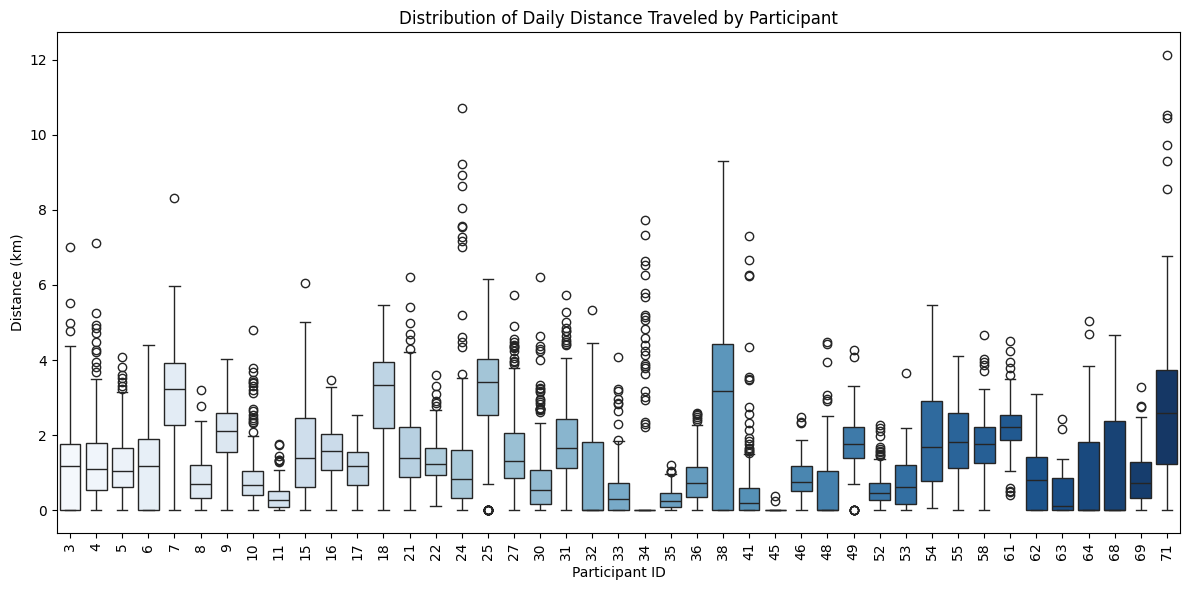

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_distance, x="participant_id", y="total_distance_per_day", palette="Blues")
plt.title("Distribution of Daily Distance Traveled by Participant")
plt.xticks(rotation=90)
plt.ylabel("Distance (km)")
plt.xlabel("Participant ID")
plt.tight_layout()
plt.show()



/var/folders/73/n4wwy86j3ms7q_z6xsy8_x1h0000gs/T/ipykernel_87506/2937892115.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=participant_day_counts, x="participant_id", y="num_days_observed", palette="Set3")


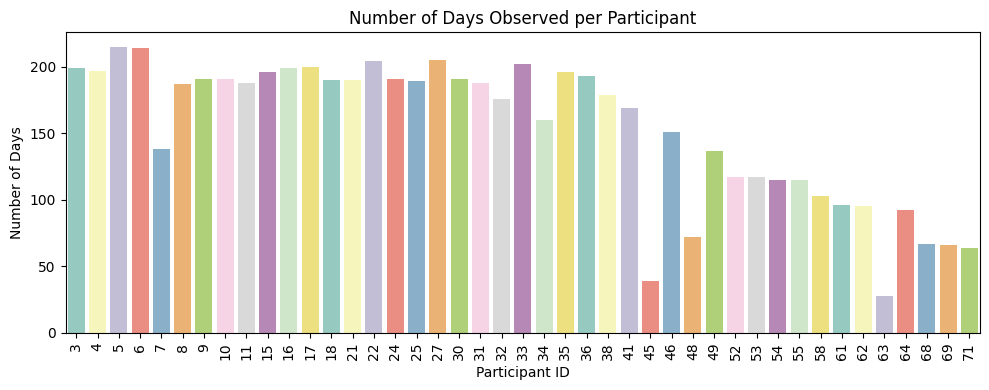

In [36]:
# Count how many days of data each participant has
participant_day_counts = (
    daily_distance.groupby("participant_id")["date"]
    .nunique()
    .reset_index(name="num_days_observed")
)

plt.figure(figsize=(10, 4))
sns.barplot(data=participant_day_counts, x="participant_id", y="num_days_observed", palette="Set3")
plt.title("Number of Days Observed per Participant")
plt.xlabel("Participant ID")
plt.ylabel("Number of Days")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



/var/folders/73/n4wwy86j3ms7q_z6xsy8_x1h0000gs/T/ipykernel_87506/986987583.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=top5_daily_distance, x="participant_id", y="total_distance_per_day", palette="coolwarm")


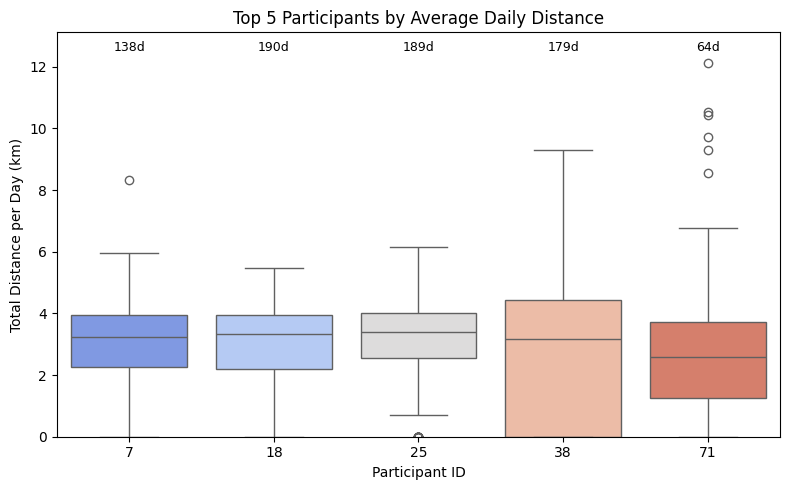

In [37]:
# TOP 5 PARTICIPANTS total distance traveled 

# Step 1: Calculate average distance and top 5 participants
avg_distance_per_participant = (
    daily_distance.groupby("participant_id")["total_distance_per_day"]
    .mean()
    .reset_index(name="avg_distance")
)
top5_ids = avg_distance_per_participant.nlargest(5, "avg_distance")["participant_id"]

# Step 2: Filter for top 5 participants
top5_daily_distance = daily_distance[daily_distance["participant_id"].isin(top5_ids)]

# Step 3: Count number of days for each top participant
top5_day_counts = (
    top5_daily_distance.groupby("participant_id")["date"]
    .nunique()
    .reset_index(name="num_days")
)

# Step 4: Merge counts into plotting data
top5_daily_distance = top5_daily_distance.merge(top5_day_counts, on="participant_id", how="left")

# Step 5: Create the annotated box plot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=top5_daily_distance, x="participant_id", y="total_distance_per_day", palette="coolwarm")
plt.title("Top 5 Participants by Average Daily Distance")
plt.xlabel("Participant ID")
plt.ylabel("Total Distance per Day (km)")

# Calculate upper limit for Y-axis
y_max = top5_daily_distance["total_distance_per_day"].max()
plt.ylim(0, y_max + 1)  # Add margin above boxes

# Annotate number of days slightly above each box
for i, row in enumerate(top5_day_counts.itertuples()):
    ax.text(i, y_max + 0.3,  # Lowered from +0.5 to +0.3 and used y_max for consistency
            f"{row.num_days}d", ha="center", va="bottom", fontsize=9, color="black")

plt.tight_layout()
plt.show()



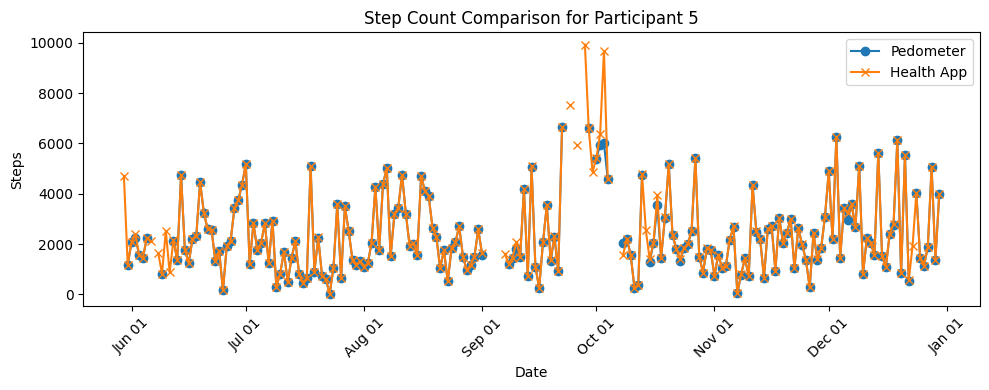

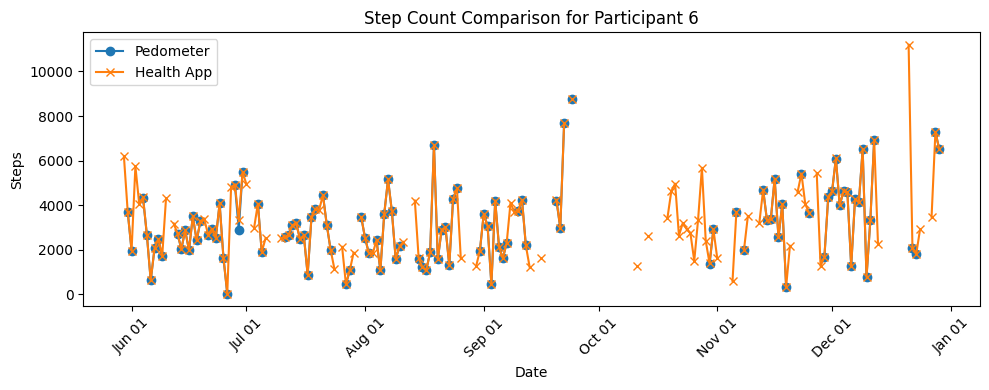

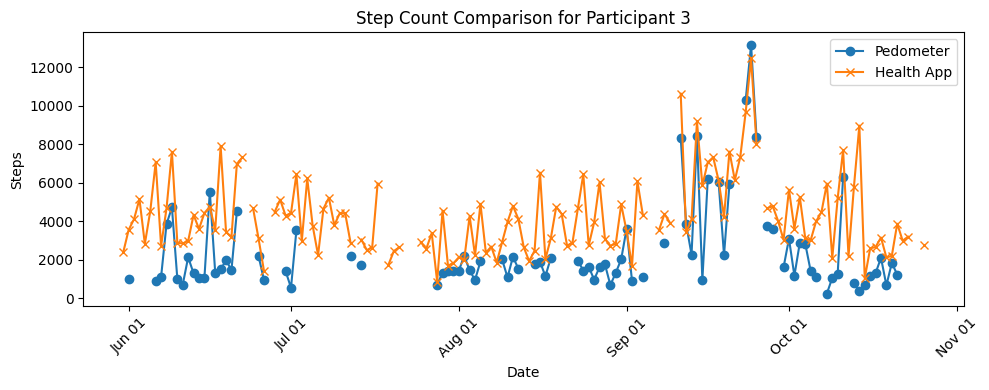

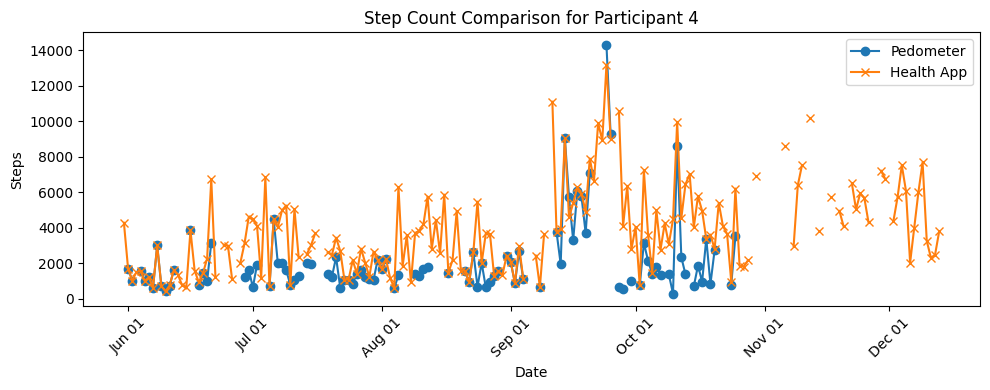

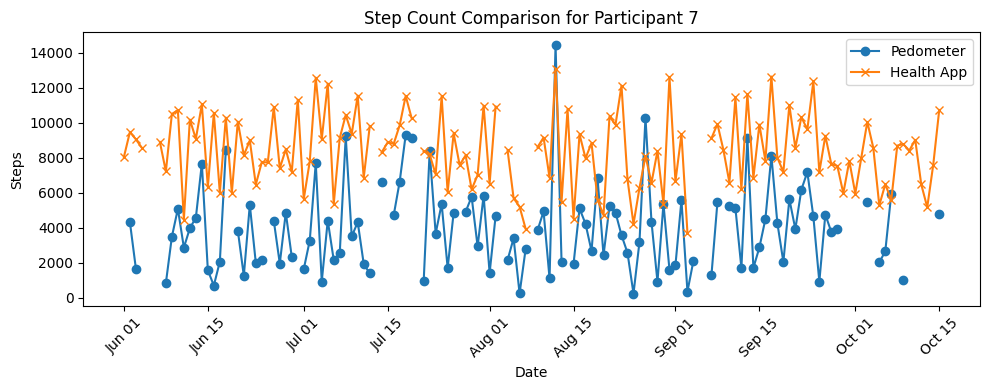

In [38]:
# CHECKING THE OVERLAPPING OF THE 2 SOURCES OF DATA PEDO AND HEALTH

# Get 3 random participants with both step sources
sample_ids = df.dropna(subset=["step_count_pedo", "step_count_health"])["participant_id"].unique()[:5]

# Filter the data for selected participants
compare_steps = df[df["participant_id"].isin(sample_ids)].copy()
compare_steps["date"] = pd.to_datetime(compare_steps["date"])  # Ensure date is datetime

import matplotlib.dates as mdates

for pid in sample_ids:
    data = compare_steps[compare_steps["participant_id"] == pid]
    
    plt.figure(figsize=(10, 4))
    plt.plot(data["date"], data["step_count_pedo"], marker='o', label="Pedometer")
    plt.plot(data["date"], data["step_count_health"], marker='x', label="Health App")
    
    plt.title(f"Step Count Comparison for Participant {pid}")
    plt.xlabel("Date")
    plt.ylabel("Steps")
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.tight_layout()
    plt.show()


/var/folders/73/n4wwy86j3ms7q_z6xsy8_x1h0000gs/T/ipykernel_87506/1020198798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


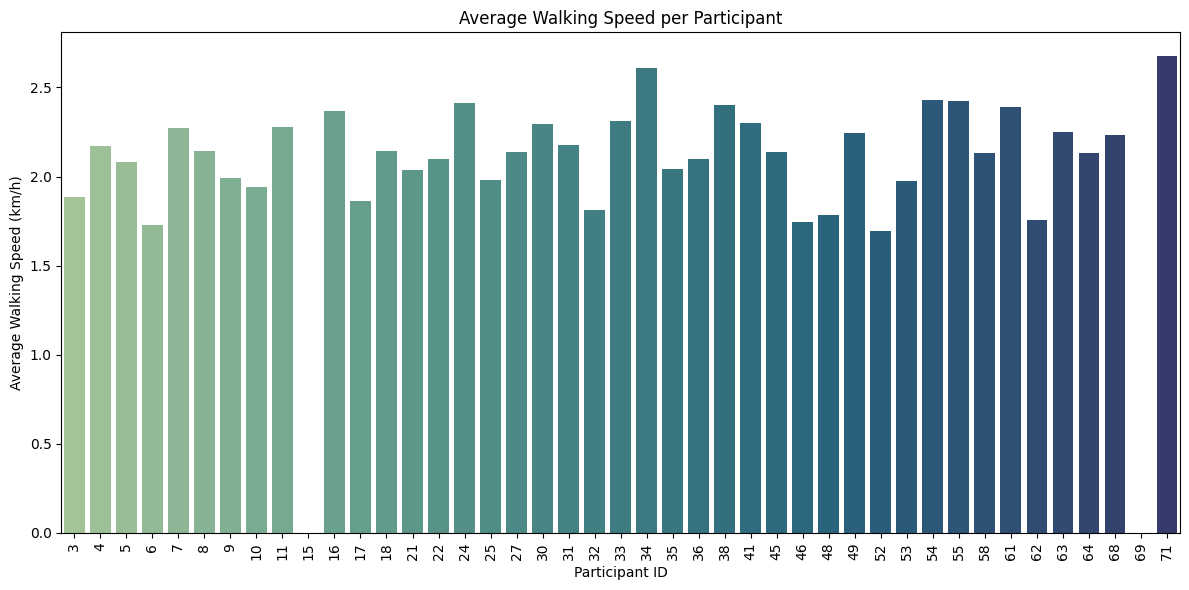

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_walking_speed.sort_values("average_walking_speed", ascending=False),
    x="participant_id",
    y="average_walking_speed",
    palette="crest"
)

plt.title("Average Walking Speed per Participant")
plt.xlabel("Participant ID")
plt.ylabel("Average Walking Speed (km/h)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


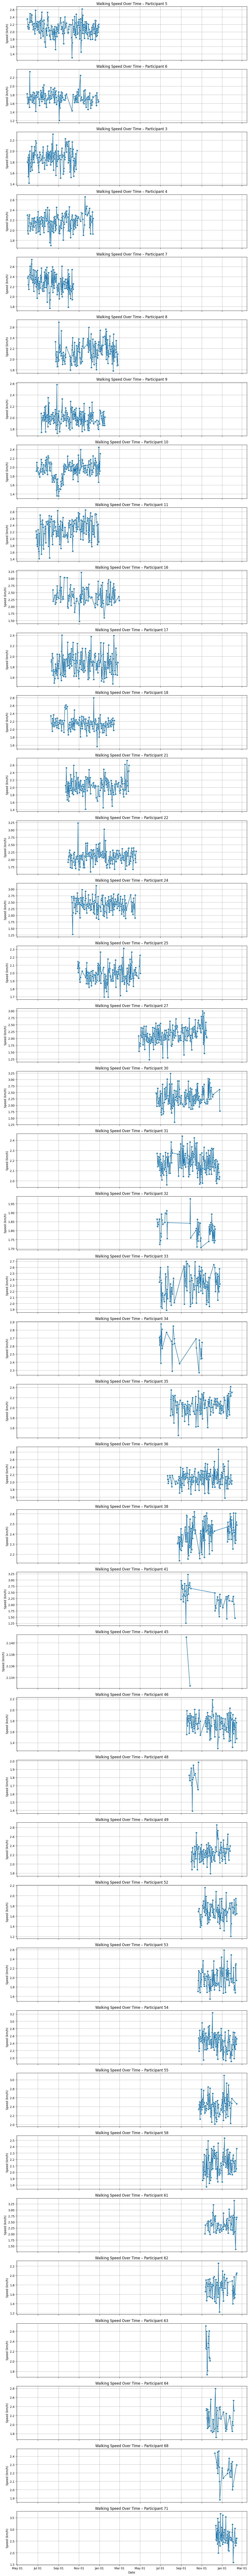

In [ ]:
import matplotlib.dates as mdates


# Drop missing values and ensure date is in datetime format
speed_over_time = df[["participant_id", "date", "walking_speed_avg"]].dropna()
speed_over_time["date"] = pd.to_datetime(speed_over_time["date"])

# Plot walking speed over time for each participant
participants = speed_over_time["participant_id"].unique()

# Create subplots
n = len(participants)
fig, axes = plt.subplots(n, 1, figsize=(12, 3 * n), sharex=True)

for i, pid in enumerate(participants):
    ax = axes[i] if n > 1 else axes
    data = speed_over_time[speed_over_time["participant_id"] == pid]
    
    sns.lineplot(data=data, x="date", y="walking_speed_avg", marker="o", ax=ax)
    ax.set_title(f"Walking Speed Over Time – Participant {pid}")
    ax.set_ylabel("Speed (km/h)")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()


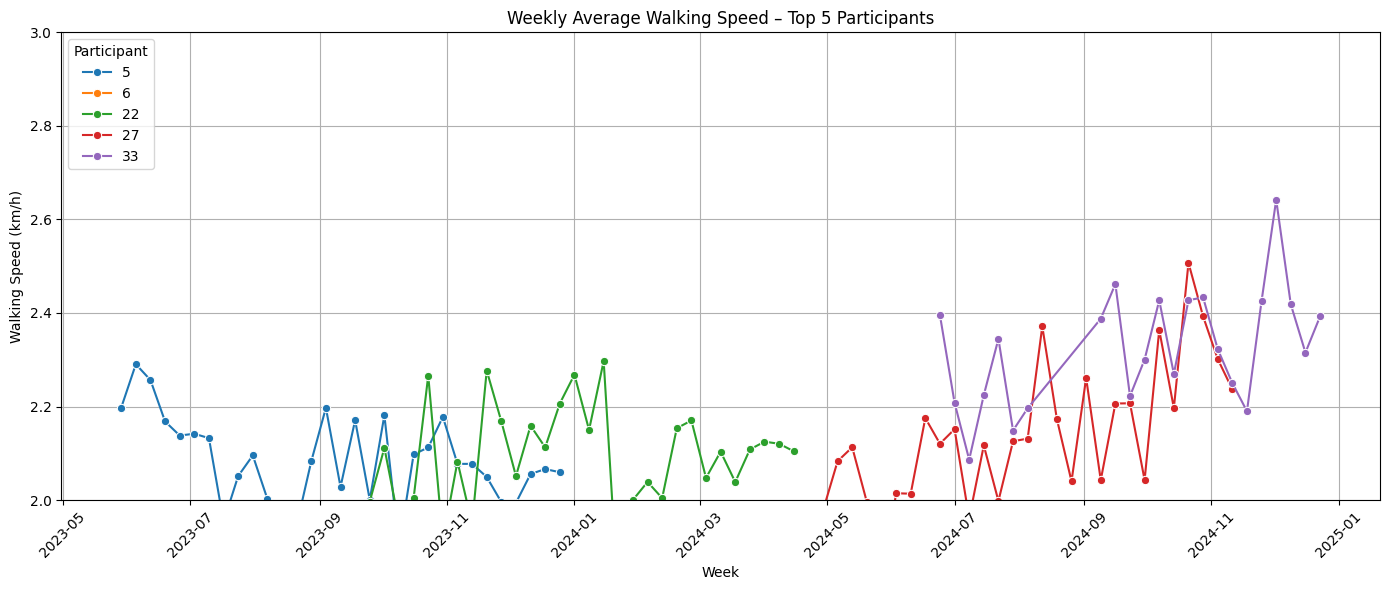

In [54]:
df["week"] = df["date"].dt.to_period("W").apply(lambda r: r.start_time)

weekly_speed = (
    df.groupby(["participant_id", "week"])["walking_speed_avg"]
    .mean()
    .reset_index()
)

# Show only top 5 participants with most weeks of data
top_participants = (
    weekly_speed["participant_id"]
    .value_counts()
    .head(5)
    .index
)
filtered = weekly_speed[weekly_speed["participant_id"].isin(top_participants)]

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=filtered,
    x="week",
    y="walking_speed_avg",
    hue="participant_id",
    marker="o",
    palette="tab10"
)

plt.ylim(2, 3)
plt.title("Weekly Average Walking Speed – Top 5 Participants")
plt.xlabel("Week")
plt.ylabel("Walking Speed (km/h)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title="Participant", loc="upper left")
plt.show()




